In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import os # accessing directory structure
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
import h2o
import os
# matplotlib and seaborn for plotting
import string
import collections
import json
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt # plotting
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline


from IPython.display import Image

pd.options.display.max_rows=20

# Turn off future warnings 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  

In [2]:

#!pip install h2o==3.30.0.1
os.listdir()

['contractions',
 'Complete Text Processing.ipynb',
 '.DS_Store',
 '.ipynb_checkpoints',
 'NLP-twitter-processing .ipynb']

In [3]:
#pd.read_csv?

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter4000.csv")
df

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0
...,...,...
3995,i just graduated,1
3996,Templating works; it all has to be done,1
3997,mommy just brought me starbucks,1
3998,@omarepps watching you on a House re-run...lov...,1


# WORD COUNT

In [5]:
df['word_count'] = df['twitts'].apply(lambda x: len(str(x).split()))

In [6]:
df.head()

,twitts,sentiment,word_count
0,is bored and wants to watch a movie any sugge...,0,10
1,back in miami. waiting to unboard ship,0,7
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12
3,ughhh i am so tired blahhhhhhhhh,0,6
4,@mandagoforth me bad! It's funny though. Zacha...,0,26


# WORD CLOUD

In [7]:
spam1 = df[df['word_count'] == 1]
spam1

,twitts,sentiment,word_count
385,homework,0,1
691,@ekrelly,0,1
1124,disappointed,0,1
1286,@officialmgnfox,0,1
1325,headache,0,1
1897,@MCRmuffin,0,1
2542,Graduated!,1,1
2947,reading,1,1
3176,@omeirdeleon,1,1
3470,www.myspace.com/myfinalthought,1,1


In [8]:
spam1['text']= spam1['twitts'].str.lower()
spam1['text'].head()

/usr/local/anaconda3/envs/nlp_course/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


385            homework 
691            @ekrelly 
1124       disappointed 
1286    @officialmgnfox 
1325           headache 
Name: text, dtype: object

# Splitting and Removing Punctuation from the Text

In [9]:
all_spam = spam1['text'].str.split(' ')
all_spam.head()

385            [homework, ]
691            [@ekrelly, ]
1124       [disappointed, ]
1286    [@officialmgnfox, ]
1325           [headache, ]
Name: text, dtype: object

# Joining the Entire Review
In this step, we will join all the 'text' records. This is required to build the text corpus which will be used to build the word cloud. The lines of code below complete this task for us.

In [10]:
all_spam_cleaned = []

for text in all_spam:
    text = [x.strip(string.punctuation) for x in text]
    all_spam_cleaned.append(text)

all_spam_cleaned[0]

text_spam = [" ".join(text) for text in all_spam_cleaned]
final_text_spam = " ".join(text_spam)
final_text_spam[:500]

'homework  ekrelly  disappointed  officialmgnfox  headache  mcrmuffin  graduated  reading  omeirdeleon  www.myspace.com/myfinalthought  gethyp3 '

# Let us build the first word cloud. The first line of code generates the word cloud on the 'final_text_spam' corpus, while the second to fifth lines of code prints the word cloud.

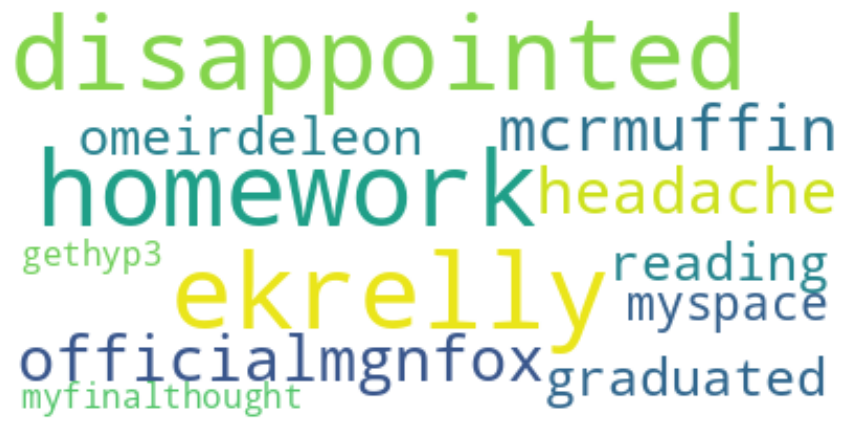

In [11]:
stopwords = set(STOPWORDS)
stopwords.update(["subject","re","vince","kaminski","enron","cc", "will", "s", "1","e","t"])

wordcloud_spam = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words=100).generate(final_text_spam)

# Lines 4 to 7
plt.figure(figsize = (15,15))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

# extract the most frequent thirty words

In [12]:
filtered_words_spam = [word for word in final_text_spam.split() if word not in stopwords]
counted_words_spam = collections.Counter(filtered_words_spam)

word_count_spam = {}

for letter, count in counted_words_spam.most_common(30):
    word_count_spam[letter] = count
    
for i,j in word_count_spam.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: homework, count: 1
Word: ekrelly, count: 1
Word: disappointed, count: 1
Word: officialmgnfox, count: 1
Word: headache, count: 1
Word: mcrmuffin, count: 1
Word: graduated, count: 1
Word: reading, count: 1
Word: omeirdeleon, count: 1
Word: www.myspace.com/myfinalthought, count: 1
Word: gethyp3, count: 1


# CHARACTER COUNT

In [13]:
def charac_counts(x):
    """
    remove the spaces between characters before counting
    """
    s = x.split()
    x = ' '.join(s)
    return len(x)

In [14]:
df['char_counts'] = df['twitts'].apply(lambda x: charac_counts(str(x)))

In [15]:
df.head()

,twitts,sentiment,word_count,char_counts
0,is bored and wants to watch a movie any sugge...,0,10,52
1,back in miami. waiting to unboard ship,0,7,38
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,65
3,ughhh i am so tired blahhhhhhhhh,0,6,32
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,141


In [16]:
#word_length = 

# AVERAGE WORD LENGTH

In [17]:
df['average_word'] = df['char_counts']/df['word_count']
df.head()

,twitts,sentiment,word_count,char_counts,average_word
0,is bored and wants to watch a movie any sugge...,0,10,52,5.200000
1,back in miami. waiting to unboard ship,0,7,38,5.428571
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,65,5.416667
3,ughhh i am so tired blahhhhhhhhh,0,6,32,5.333333
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,141,5.423077


# STOP WORD COUNTS

In [18]:
print(stopwords)

{"it's", "they'll", "can't", 'where', 'again', 'can', "shan't", 'she', "he'll", 'then', 'by', "they're", 'com', 'is', 'how', "haven't", "how's", 'were', "when's", 'this', 'doing', "she'd", "shouldn't", 'other', "there's", 'who', 'off', "hasn't", 'of', 'to', "we'll", "you've", 'those', 're', 'we', 'and', 'whom', 'subject', 'from', 'been', 'during', 'had', 'if', 'only', 'very', "doesn't", 'at', 'because', 'into', "he's", 'has', 'above', 'do', "mustn't", 'yourselves', 'before', "won't", 'which', "couldn't", "they've", 'kaminski', 'should', 'than', 'ourselves', 'some', 'against', 'once', 'why', 'get', 'www', 'on', 'else', 'my', "you'll", 'also', 's', "you'd", 'after', 'would', 'does', "don't", "here's", 'out', 'herself', "isn't", 'k', 'are', 'as', 'what', 'here', 'am', 'while', 'nor', "he'd", 'theirs', 'could', 'our', 'that', 'http', "hadn't", 'you', 'have', 'or', 'for', 'in', 'up', "i'd", 'themselves', 'through', 'cannot', 'but', 'hence', 'a', "we'd", 'too', "we're", 'few', "i've", 'down'

In [19]:
#x = 'This is the text data'

In [20]:
#len([t for t in x.split() if t in stopwords])

In [21]:
df['stopw_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in stopwords]))

In [22]:
df.head()

,twitts,sentiment,word_count,char_counts,average_word,stopw_count
0,is bored and wants to watch a movie any sugge...,0,10,52,5.200000,5
1,back in miami. waiting to unboard ship,0,7,38,5.428571,2
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,65,5.416667,0
3,ughhh i am so tired blahhhhhhhhh,0,6,32,5.333333,3
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,141,5.423077,12


# COUNT @Hashtags and @Mention

In [23]:
x = '@ankush is #awesome'
x.split()

['@ankush', 'is', '#awesome']

In [24]:
len([t for t in  x.split() if t.startswith('@')])

1

In [25]:
df['@mention_count'] = df['twitts'].apply(lambda x: len([t for t in  x.split() if t.startswith('@')]))

In [26]:
df['hash'] = df['twitts'].apply(lambda x: len([t for t in  x.split() if t.startswith('#')]))

In [27]:
df.head()

,twitts,sentiment,word_count,char_counts,average_word,stopw_count,@mention_count,hash
0,is bored and wants to watch a movie any sugge...,0,10,52,5.200000,5,0,0
1,back in miami. waiting to unboard ship,0,7,38,5.428571,2,0,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,65,5.416667,0,1,0
3,ughhh i am so tired blahhhhhhhhh,0,6,32,5.333333,3,0,0
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,141,5.423077,12,2,0


# NUMERIC DIGITS

In [28]:
x = "This is number 9"
x.split()

['This', 'is', 'number', '9']

In [29]:
df['numeric_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [30]:
df[df['numeric_count'] > 1]

,twitts,sentiment,word_count,char_counts,average_word,stopw_count,@mention_count,hash,numeric_count
53,@Gen215 ROFL following Jesus! Found 1 th othr ...,0,29,137,4.724138,9,1,0,3
125,@MasterAwesome 23 almost 24 im an old lady,0,8,42,5.250000,1,1,0,2
174,ohhh 2 write bak 2 ppl u hav 2 put their names...,0,32,137,4.281250,8,0,0,4
209,AT&amp;T: &quot;you have 4 bars of 3G. oh wait...,0,22,126,5.727273,7,0,0,2
278,Listenin 2 a bunch of janet's old slow songs w...,0,21,100,4.761905,5,0,0,2
...,...,...,...,...,...,...,...,...,...
3536,"@ashleytisdale good luck 4 the MMA u,mils&amp...",1,20,122,6.100000,5,1,0,2
3556,@djbriancua yeah thats a good start. back then...,1,28,136,4.857143,12,1,0,2
3577,@jaime_fox @jason_mcintyre Sorry abt game 1 S...,1,25,134,5.360000,7,2,0,2
3578,@sergeb very cool! Always nice to hear 2 of my...,1,16,83,5.187500,4,1,0,2


# UPPER  WORD COUNT

In [31]:
x = "THIS IS NUMBER 9"
x.split()

['THIS', 'IS', 'NUMBER', '9']

In [32]:
len([t for t in  x.split() if t.isupper()])

3

In [33]:
df['upperw_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [34]:
df['twitts'][2]


"@misskpey awwww dnt dis brng bak memoriessss,  I thnk I'm sad. LoL"

# LOWER CASE CONVERSION

In [35]:
##LOWERCASE
df['lower_case'] = df['twitts'].apply(lambda x: len([t for t in str(x).lower()]))

# CONTRACTIONS

In [36]:
print(os.listdir('/Users/ankushsingal/Desktop/Natural_language_processing/Codes/Complete Text Processing/contractions'))

['contractions.txt', 'contractions.json', 'nomi.txt', 'README.md', '.git']


In [37]:
with open('/Users/ankushsingal/Desktop/Natural_language_processing/Codes/Complete Text Processing/contractions/contractions.json', 'r') as f:
    contractions = json.load(f)

In [38]:
#contractions

In [39]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring'}

In [40]:
def cont_to_exp(x):
    if isinstance(x,str):
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, str(value))
        return x
    else:
        return x
    
    

In [41]:
x = "i'm don't he'll"

In [42]:
df['twitts'] = df['twitts'].str.lower()

In [43]:
cont_to_exp(x)

'i am do not he will'

In [44]:
%%timeit
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))

113 ms ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [45]:
df.head(5)

,twitts,sentiment,word_count,char_counts,average_word,stopw_count,@mention_count,hash,numeric_count,upperw_count,lower_case
0,is bored and wants to watch a movie any sugge...,0,10,52,5.200000,5,0,0,0,0,53
1,back in miami. waiting to unboard ship,0,7,38,5.428571,2,0,0,0,0,40
2,@misskpey awwww dnt this bring back memoriesss...,0,12,65,5.416667,0,1,0,0,1,66
3,ughhh i am so tired blahhhhhhhhh,0,6,32,5.333333,3,0,0,0,0,33
4,@mandagoforth me bad! it is funny though. zach...,0,26,141,5.423077,12,2,0,0,0,142


# COUNT AND REMOVE EMAILS

In [46]:
df[df['twitts'].str.contains('hotmail.com')]

,twitts,sentiment,word_count,char_counts,average_word,stopw_count,@mention_count,hash,numeric_count,upperw_count,lower_case
3713,@securerecs arghh me please markbradbury_16@h...,1,5,55,11.0,0,1,0,0,0,56


In [47]:
df.iloc[3713].twitts

'@securerecs arghh me please  markbradbury_16@hotmail.com'

In [48]:
import re

In [145]:

x= '@securerecs arghh Me Please  markbradbury_16@hotmail.com'

In [146]:
pattern = r'\b\w+@\w+\.\w+'

In [147]:
re.findall( r'\b\w+@\w+\.\w+',x)

['markbradbury_16@hotmail.com']

In [148]:
df['emails'] = df['twitts'].apply(lambda x:re.findall( r'\w+@\w+\.\w+',x))

In [149]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [150]:
df[df['emails_count']>0]

,twitts,sentiment,word_count,char_counts,average_word,stopw_count,@mention_count,hash,numeric_count,upperw_count,lower_case,emails,emails_count,url_flags,twitts_no_stop


In [152]:
re.sub( r'\w+@\w+\.\w+',"",x)

'@securerecs arghh Me Please  '

In [56]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub( r'\b\w+@\w+\.\w+',"",x))

In [57]:
df.head()

,twitts,sentiment,word_count,char_counts,average_word,stopw_count,@mention_count,hash,numeric_count,upperw_count,lower_case,emails,emails_count
0,is bored and wants to watch a movie any sugge...,0,10,52,5.200000,5,0,0,0,0,53,[],0
1,back in miami. waiting to unboard ship,0,7,38,5.428571,2,0,0,0,0,40,[],0
2,@misskpey awwww dnt this bring back memoriesss...,0,12,65,5.416667,0,1,0,0,1,66,[],0
3,ughhh i am so tired blahhhhhhhhh,0,6,32,5.333333,3,0,0,0,0,33,[],0
4,@mandagoforth me bad! it is funny though. zach...,0,26,141,5.423077,12,2,0,0,0,142,[],0


# count url and remove them

In [58]:
df[df['twitts'].str.contains('http','www')]

,twitts,sentiment,word_count,char_counts,average_word,stopw_count,@mention_count,hash,numeric_count,upperw_count,lower_case,emails,emails_count
16,@brianquest i made 1 fo you 2: http://bit.ly/e...,0,19,99,5.210526,3,1,0,1,3,101,[],0
98,heading to work http://twitpic.com/4eojz,0,4,40,10.000000,1,0,0,0,0,41,[],0
99,@blondeblogger http://twitpic.com/4w8hk - i am...,0,10,71,7.100000,4,1,0,0,0,72,[],0
144,i miss you â« http://blip.fm/~8lc2f,0,5,36,7.200000,1,0,0,0,1,37,[],0
183,photo: miss germany http://tumblr.com/xf825f012,0,4,47,11.750000,0,0,0,0,0,48,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,new staark video of &quot;sweet release&quot; ...,1,20,137,6.850000,5,0,0,0,1,138,[],0
3826,http://tinyurl.com/kwmynq helmet - unsung to s...,1,9,84,9.333333,2,0,0,0,0,85,[],0
3837,@r0ckergirl14 wow sweet again!! http://twitpi...,1,5,56,11.200000,0,1,0,0,0,57,[],0
3958,someone has been creative with my #deskmess wh...,1,13,103,7.923077,7,1,1,0,0,105,[],0


In [59]:
x = 'hi, thanks to watching it. for more visit https://youtube.com/kgptalkie'

In [60]:
re.findall( r'(?im)(https|ftp|ssh|http)://(\S+)\/(\S*)',x)

[('https', 'youtube.com', 'kgptalkie')]

In [61]:
df['url_flags'] = df['twitts'].apply(lambda x: len(re.findall( r'(?im)(https|ftp|ssh|http)://(\S+)\/(\S*)',x)))

In [62]:
df[df['url_flags']>0]

,twitts,sentiment,word_count,char_counts,average_word,stopw_count,@mention_count,hash,numeric_count,upperw_count,lower_case,emails,emails_count,url_flags
16,@brianquest i made 1 fo you 2: http://bit.ly/e...,0,19,99,5.210526,3,1,0,1,3,101,[],0,1
98,heading to work http://twitpic.com/4eojz,0,4,40,10.000000,1,0,0,0,0,41,[],0,1
99,@blondeblogger http://twitpic.com/4w8hk - i am...,0,10,71,7.100000,4,1,0,0,0,72,[],0,1
144,i miss you â« http://blip.fm/~8lc2f,0,5,36,7.200000,1,0,0,0,1,37,[],0,1
183,photo: miss germany http://tumblr.com/xf825f012,0,4,47,11.750000,0,0,0,0,0,48,[],0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,new staark video of &quot;sweet release&quot; ...,1,20,137,6.850000,5,0,0,0,1,138,[],0,1
3826,http://tinyurl.com/kwmynq helmet - unsung to s...,1,9,84,9.333333,2,0,0,0,0,85,[],0,2
3837,@r0ckergirl14 wow sweet again!! http://twitpi...,1,5,56,11.200000,0,1,0,0,0,57,[],0,1
3958,someone has been creative with my #deskmess wh...,1,13,103,7.923077,7,1,1,0,0,105,[],0,1


In [63]:
re.sub( r'(?im)(https|ftp|ssh|http)://(\S+)\/(\S*)',"",x)

'hi, thanks to watching it. for more visit '

In [64]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub( r'(?im)(https|ftp|ssh|http)://(\S+)\/(\S*)',"",x))

In [65]:
df.head(5)

,twitts,sentiment,word_count,char_counts,average_word,stopw_count,@mention_count,hash,numeric_count,upperw_count,lower_case,emails,emails_count,url_flags
0,is bored and wants to watch a movie any sugge...,0,10,52,5.200000,5,0,0,0,0,53,[],0,0
1,back in miami. waiting to unboard ship,0,7,38,5.428571,2,0,0,0,0,40,[],0,0
2,@misskpey awwww dnt this bring back memoriesss...,0,12,65,5.416667,0,1,0,0,1,66,[],0,0
3,ughhh i am so tired blahhhhhhhhh,0,6,32,5.333333,3,0,0,0,0,33,[],0,0
4,@mandagoforth me bad! it is funny though. zach...,0,26,141,5.423077,12,2,0,0,0,142,[],0,0


# REMOVE RT FROM TWEET DATA

In [66]:
df[df['twitts'].str.contains('rt')]

,twitts,sentiment,word_count,char_counts,average_word,stopw_count,@mention_count,hash,numeric_count,upperw_count,lower_case,emails,emails_count,url_flags
4,@mandagoforth me bad! it is funny though. zach...,0,26,141,5.423077,12,2,0,0,0,142,[],0,0
23,"ut oh, i wonder if the ram on the desktop is s...",0,14,59,4.214286,6,0,0,0,2,60,[],0,0
59,@paulmccourt dunno what sky you're looking at!...,0,15,94,6.266667,4,1,0,0,0,95,[],0,0
75,im back home in belfast im realli tired thoug...,0,22,105,4.772727,6,0,0,0,1,106,[],0,0
81,@lilmonkee987 i know what you mean... i feel s...,0,11,58,5.272727,5,1,0,0,0,59,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,for the press so after she recovered she kille...,1,24,123,5.125000,0,0,0,0,0,124,[],0,0
3919,earned her cpr &amp; first aid certifications!,1,7,46,6.571429,1,0,0,0,1,47,[],0,0
3945,"@teciav &quot;i look high, i look low, i look ...",1,23,128,5.565217,9,1,0,0,0,129,[],0,0
3951,i am soo very parched. and hungry. oh and i am...,1,21,107,5.095238,6,0,0,2,1,108,[],0,0


In [67]:
x = 'rt @username: hello hirt'

In [68]:
re.findall(r'(?im)\brt\b',x)

['rt']

In [69]:
re.sub(r'(?im)\brt\b',"",x).strip()

'@username: hello hirt'

In [70]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'(?im)\brt\b',"",x).strip())

In [71]:
df.head()

,twitts,sentiment,word_count,char_counts,average_word,stopw_count,@mention_count,hash,numeric_count,upperw_count,lower_case,emails,emails_count,url_flags
0,is bored and wants to watch a movie any sugge...,0,10,52,5.200000,5,0,0,0,0,53,[],0,0
1,back in miami. waiting to unboard ship,0,7,38,5.428571,2,0,0,0,0,40,[],0,0
2,@misskpey awwww dnt this bring back memoriesss...,0,12,65,5.416667,0,1,0,0,1,66,[],0,0
3,ughhh i am so tired blahhhhhhhhh,0,6,32,5.333333,3,0,0,0,0,33,[],0,0
4,@mandagoforth me bad! it is funny though. zach...,0,26,141,5.423077,12,2,0,0,0,142,[],0,0


# Special Chars removal or punctuation removal

In [72]:
x = df['twitts'].iloc[4]
x

'@mandagoforth me bad! it is funny though. zachary quinto is only there for a few though.  &amp; to reply just put the @ symbol before the name!'

In [73]:
re.sub(r'[^\w ]+', "", x)

'mandagoforth me bad it is funny though zachary quinto is only there for a few though  amp to reply just put the  symbol before the name'

In [74]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'[^\w ]+', "", x))

In [75]:
df.head()

,twitts,sentiment,word_count,char_counts,average_word,stopw_count,@mention_count,hash,numeric_count,upperw_count,lower_case,emails,emails_count,url_flags
0,is bored and wants to watch a movie any sugge...,0,10,52,5.200000,5,0,0,0,0,53,[],0,0
1,back in miami waiting to unboard ship,0,7,38,5.428571,2,0,0,0,0,40,[],0,0
2,misskpey awwww dnt this bring back memoriessss...,0,12,65,5.416667,0,1,0,0,1,66,[],0,0
3,ughhh i am so tired blahhhhhhhhh,0,6,32,5.333333,3,0,0,0,0,33,[],0,0
4,mandagoforth me bad it is funny though zachary...,0,26,141,5.423077,12,2,0,0,0,142,[],0,0


# Remove multiple spaces "hi   hello    "

In [76]:
x =  'hi    hello     how are you'

In [77]:
' '.join(x.split())

'hi hello how are you'

In [78]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join(x.split()))

# Remove HTML tags

In [79]:
!pip install beautifulsoup4

In [80]:

from bs4 import BeautifulSoup

In [81]:
#pip install bs4

In [82]:
x = '<html><h1> thanks for watching it </h1></html>'

In [83]:
BeautifulSoup(x, "html.parser").get_text().strip()

'thanks for watching it'

In [84]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [86]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text().strip())

CPU times: user 239 ms, sys: 20.4 ms, total: 259 ms
Wall time: 258 ms


# Remove Accented Chars 

In [87]:
x = 'Áccěntěd těxt'

In [88]:
import unicodedata

In [89]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [90]:
df['twitts'] = df['twitts'].apply(lambda x: remove_accented_chars(x))

# Remove Stop Words¶

In [91]:
x = 'this is a stop words'

In [92]:
' '.join([t for t in x.split() if t not in stopwords])

'stop words'

In [93]:
df['twitts_no_stop'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))

# Convert into base or root form of word

In [94]:
nlp = spacy.load('en_core_web_sm')

In [95]:
x = 'this is chocolates. what is times? this balls'

In [96]:
def make_to_base(x):
    x = str(x)
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = token.lemma_
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text

        x_list.append(lemma)
    return ' '.join(x_list)

In [97]:
make_to_base(x)

'this is chocolate . what is time ? this ball'

In [98]:
df['twitts'] = df['twitts'].apply(lambda x: make_to_base(x))

# Common words removal 



In [99]:
x = 'this is this okay bye'

In [100]:
text = ' '.join(df['twitts'])

In [101]:
len(text)

273593

In [102]:
text = text.split()

In [103]:
len(text)

54242

In [104]:
freq_comm = pd.Series(text).value_counts()

In [105]:
f20 = freq_comm[:20]

In [106]:
f20

i       2531
to      1461
the     1299
a        964
you      896
not      894
is       880
my       825
it       735
and      733
have     693
do       618
in       571
for      521
of       482
go       480
am       472
that     458
get      447
me       432
dtype: int64

In [107]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in f20]))

# Rare words removal

In [108]:
rare20 = freq_comm.tail(20)

In [109]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

# Word Cloud Visualization

In [110]:
text = ' '.join(df['twitts'])

In [111]:
len(text)

220616

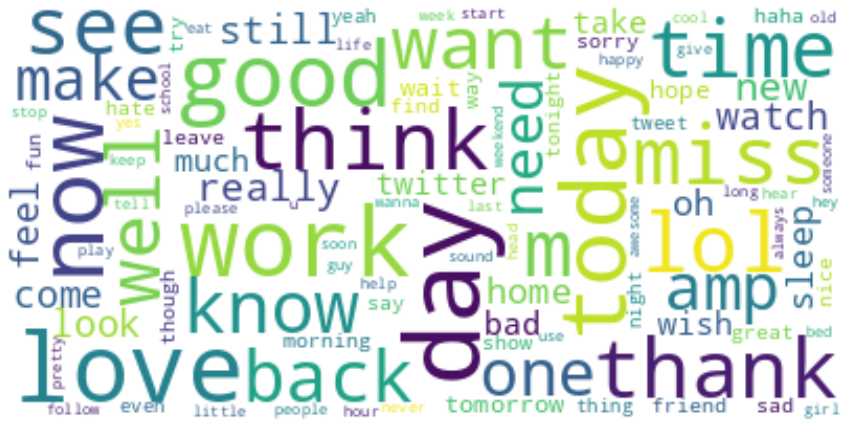

In [112]:
stopwords = set(STOPWORDS)
stopwords.update(["subject","re","vince","kaminski","enron","cc", "will", "s", "1","e","t"])

wordcloud_spam = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words=100).generate(text)

# Lines 4 to 7
plt.figure(figsize = (15,15))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

# Spelling Correction

In [117]:
!pip install -U textblob

In [118]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to
[nltk_data]     /Users/ankushsingal/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ankushsingal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ankushsingal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ankushsingal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/ankushsingal/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/ankushsingal/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [127]:
from textblob import TextBlob

In [128]:
x = 'thankks forr waching it'

In [129]:
x = TextBlob(x).correct()

In [130]:
x

TextBlob("thanks for watching it")

# Tokenization using TextBlob

In [131]:
x = 'thanks#watching this video. please like it'

In [132]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [133]:
doc = nlp(x)
for token in doc:
    print(token)

thanks#watching
this
video
.
please
like
it


# Detecting Nouns

In [134]:
x = 'Breaking News: Donal Trump, the president of the USA is looking to sign a deal to mine the moon'

In [135]:
doc = nlp(x)

In [136]:
for noun in doc.noun_chunks:
    print(noun)

Breaking News
Donal Trump
the president
the USA
a deal
the moon


# Language Translation and Detection

In [137]:
x

'Breaking News: Donal Trump, the president of the USA is looking to sign a deal to mine the moon'

In [138]:
tb = TextBlob(x)

In [139]:
tb.detect_language()

'en'

In [140]:
tb.translate(to = 'fr')

TextBlob("Dernières nouvelles: Donal Trump, le président des États-Unis cherche à signer un accord pour miner la lune")

# Use TextBlob's Inbuilt Sentiment Classifier¶

In [141]:
from textblob.sentiments import NaiveBayesAnalyzer

In [142]:
x = 'we all stands together. we are gonna win this fight'

In [143]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [144]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.9180581552428241, p_neg=0.0819418447571765)